In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Q1

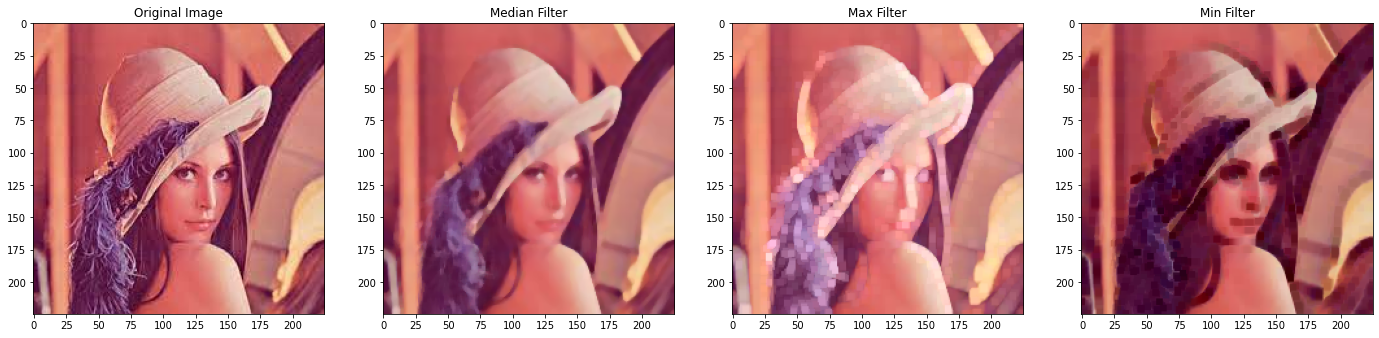

In [30]:
original_image = cv2.imread("../problem set/image1.jpg")
original_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

# Apply Median Filter
median_filtered = cv2.medianBlur(original_image, ksize=5)  # Adjust the kernel size as needed
# Apply Max Filter
max_filtered = cv2.dilate(original_image, kernel=np.ones((5, 5), np.uint8))
# Apply Min Filter
min_filtered = cv2.erode(original_image, kernel=np.ones((5, 5), np.uint8))

plt.figure(figsize=(24, 8))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.plot()
plt.imshow(original_image)

plt.subplot(1, 4, 2)
plt.title("Median Filter")
plt.plot()
plt.imshow(median_filtered)

plt.subplot(1, 4, 3)
plt.title("Max Filter")
plt.plot()
plt.imshow(max_filtered)

plt.subplot(1, 4, 4)
plt.title("Min Filter")
plt.plot()
plt.imshow(min_filtered)

plt.show()

# Q2

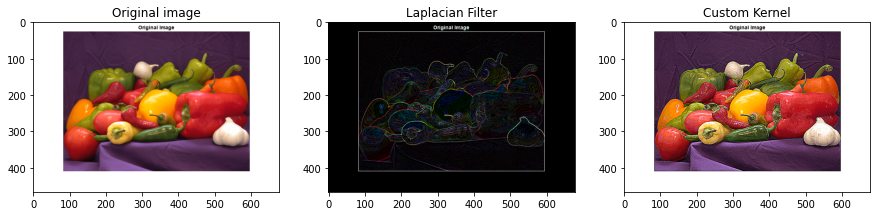

In [33]:
# Load the image in color
image = cv2.imread('../problem set/image2.jpg')

# Convert the image to RGB (OpenCV loads images in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the kernels
nlp = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
og = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

kernel = og - nlp

# Apply the filters independently to each channel
result_nlp = cv2.filter2D(image_rgb, -1, nlp)
result_kernel = cv2.filter2D(image_rgb, -1, kernel)

# Display the images
plt.figure(figsize=(15, 10))

# Original, NLP, Kernel
plt.subplot(131), plt.imshow(image_rgb), plt.title('Original image')
plt.subplot(132), plt.imshow(result_nlp), plt.title('Laplacian Filter')
plt.subplot(133), plt.imshow(result_kernel), plt.title('Custom Kernel')

plt.show()


# Q3

img3:


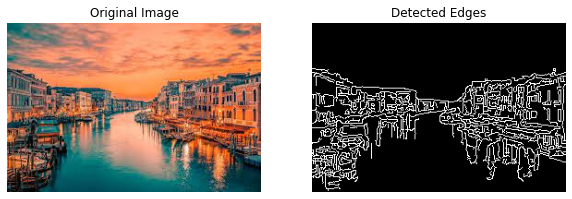

img4:


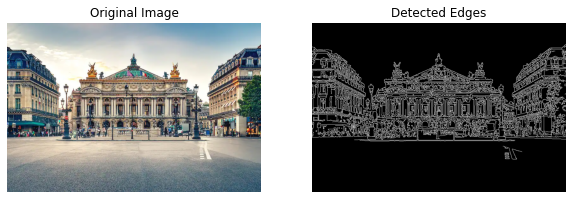

In [27]:
def detect_edges(image_path):
    original_image = cv2.imread(image_path)
    
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image_gray = cv2.cvtColor(original_image_rgb, cv2.COLOR_RGB2GRAY)

    blurred_image = cv2.GaussianBlur(original_image_gray, (3, 3), 0)

    edges = cv2.Canny(blurred_image, 70, 280)  # Adjust the threshold values as needed

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Detected Edges")
    plt.imshow(edges, cmap="gray")
    plt.axis("off")

    plt.show()

In [ ]:
print('img3:')
detect_edges('../problem set/image3.jpg')

print('img4:')
detect_edges('../problem set/image4.jpg')

# Q4

In [10]:
def apply_filters(image_path, filter_type, kernel_size):

    original_image = cv2.imread(image_path)
    
    # Convert the image to RGB (OpenCV loads images in BGR by default)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    if filter_type == 'average':
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
        filtered_image = cv2.filter2D(original_image_rgb, -1, kernel)
        
    elif filter_type == 'gaussian':
        filtered_image = cv2.GaussianBlur(original_image_rgb, (kernel_size, kernel_size), 0)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(original_image_rgb)

    plt.subplot(1, 4, 2)
    plt.title(f"{kernel_size}x{kernel_size} {filter_type.capitalize()} Filter")
    plt.imshow(filtered_image)

    plt.show()



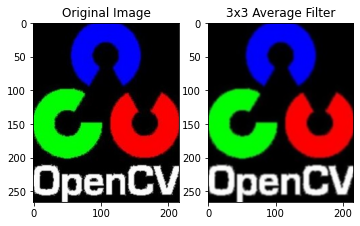

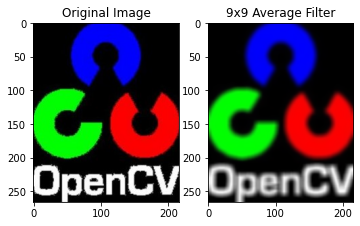

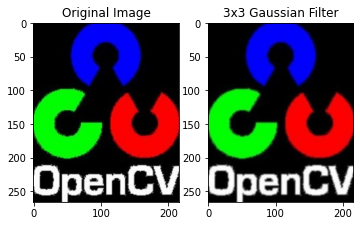

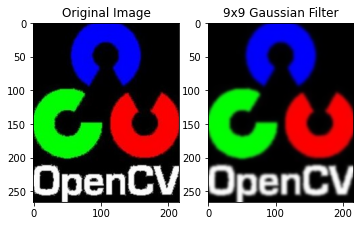

In [11]:
apply_filters('../problem set/image5.jpg', 'average', 3)
apply_filters('../problem set/image5.jpg', 'average', 9)

apply_filters('../problem set/image5.jpg', 'gaussian', 3)
apply_filters('../problem set/image5.jpg', 'gaussian', 9)

# Q5

License Plate: BGY224-NZ


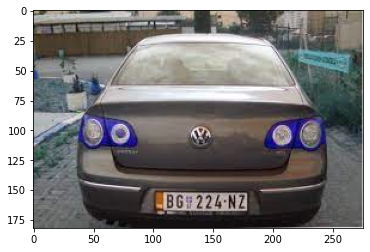

In [54]:
import pytesseract

# Set the path to the Tesseract executable (update this with your path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def recognize_license_plate(image_path):
    # Read the input image
    image = cv2.imread(image_path)
    plt.imshow(image)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply some preprocessing (you may need to fine-tune these steps)
    _, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through the contours and find the bounding box of the license plate
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)

        # Assuming a typical license plate aspect ratio (adjust as needed)
        if 2.5 < aspect_ratio < 5:
            # Extract the region of interest (ROI) corresponding to the license plate
            roi = image[y:y + h, x:x + w]

            # Use Tesseract to perform OCR on the license plate region
            license_plate_text = pytesseract.image_to_string(roi, config='--psm 8')

            return license_plate_text.strip()

    return None

# Example usage
image_path = '../problem set/image6.1.jpg'
license_plate = recognize_license_plate(image_path)

if license_plate:
    print(f"License Plate: {license_plate}")
else:
    print("License plate not found.")


# Q6

In [ ]:
import face_recognition

# # Load an image of the person you want to recognize
# known_image = face_recognition.load_image_file("path_to_known_image.jpg")
# known_encoding = face_recognition.face_encodings(known_image)[0]

# Capture video from your webcam or any video source
video_capture = cv2.VideoCapture(0)

while True:
    # Capture each frame from the video feed
    ret, frame = video_capture.read()

    # Find all face locations and face encodings in the current frame
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    # Loop through each face found in the frame
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Check if the face matches the known face
        matches = face_recognition.compare_faces([known_encoding], face_encoding)

        name = "Unknown"

        if matches[0]:
            name = "Known Person"

        # Draw a rectangle around the face and display the name
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Display the resulting frame
    cv2.imshow("Video", frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
video_capture.release()
cv2.destroyAllWindows()


# Q7

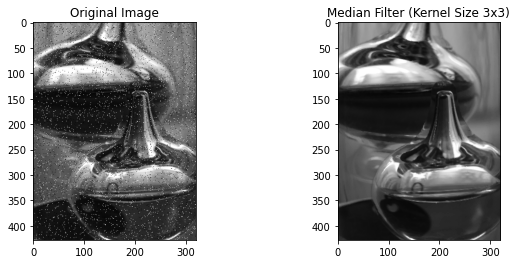

In [33]:
def remove_salt_and_pepper_noise(image_path, kernel_size):

    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    denoised_image = cv2.medianBlur(original_image, kernel_size)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title(f"Median Filter (Kernel Size {kernel_size}x{kernel_size})")
    plt.imshow(denoised_image, cmap="gray")

    plt.show()

remove_salt_and_pepper_noise('../problem set/image7.jpg', kernel_size=3)  

# Q8

## Q1-1

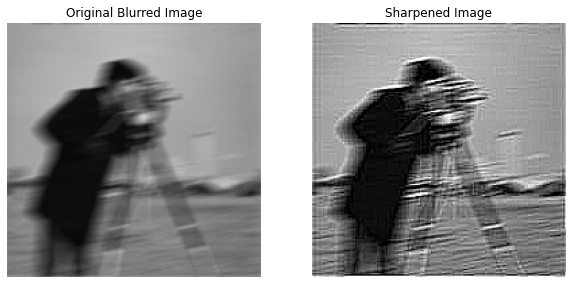

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your blurred image
blurred_image = cv2.imread("../problem set/image8.1.jpg")

# Apply a sharpening filter
sharpening_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(blurred_image, -1, kernel=sharpening_kernel)

# Display the original and sharpened images using matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Original Blurred Image")
plt.axis("off")

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis("off")

plt.show()


## Q1-2

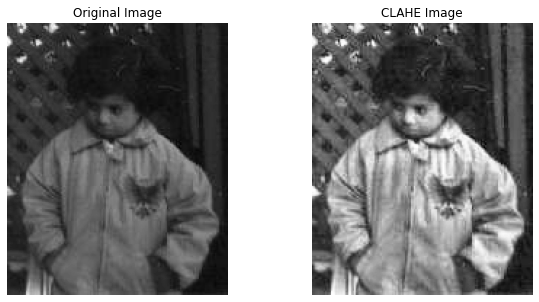

In [5]:
image_path = '../problem set/image8.2.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=1.8, tileGridSize=(12, 12))
clahe_image = clahe.apply(original_image)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE Image')
plt.axis('off')

plt.show()


## Q1-3

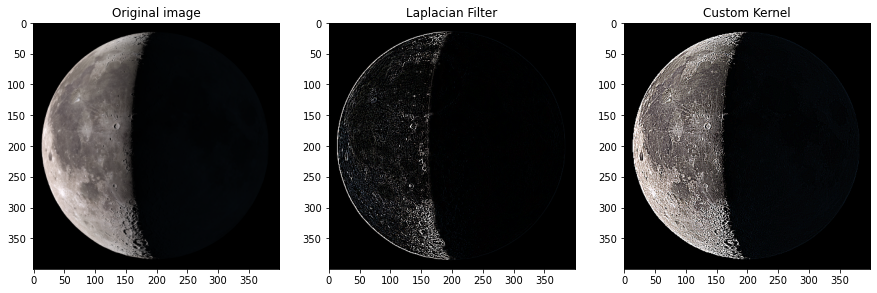

In [29]:
image = cv2.imread('../problem set/image8.3.jpg')

# Define the kernels
nlp = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
og = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])

kernel = og - nlp

# Apply the filters independently to each channel
result_nlp = cv2.filter2D(image_rgb, -1, nlp)
result_kernel = cv2.filter2D(image_rgb, -1, kernel)

# Display the images
plt.figure(figsize=(15, 10))

# Original, NLP, Kernel
plt.subplot(131), plt.imshow(image_rgb), plt.title('Original image')
plt.subplot(132), plt.imshow(result_nlp), plt.title('Laplacian Filter')
plt.subplot(133), plt.imshow(result_kernel), plt.title('Custom Kernel')

plt.show()

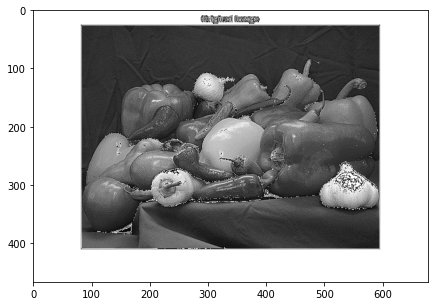

In [61]:
image_path = '../problem set/image2.jpg'

image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

kernel_size = 3
# kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
filtered_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
#cv2.filter2D(image, -1, kernel)
toshow = image +3*(image-filtered_image)
plt.figure(figsize=(10, 5))

plt.imshow(toshow, cmap='gray')
plt.show()